In [76]:
import numpy as np
import pandas as pd

In [77]:
from sklearn.datasets import load_breast_cancer
dataset=load_breast_cancer()
X=dataset.data
Y=dataset.target

In [78]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [79]:
X_train=X_train.T
X_test=X_test.T
Y_train=Y_train.reshape(1,-1)

In [80]:
nn_arch=[
    {'layer_units':30,'activation':'none'},
    {'layer_units':5,'activation':'relu'},
    {'layer_units':4,'activation':'relu'},
    {'layer_units':3,'activation':'relu'},
    {'layer_units':1,'activation':'sigmoid'},
]

In [81]:
def initialize_parameters(nn_arch,seed_value):
    np.random.seed(seed_value)
    parameters={}
    for l in range(1,len(nn_arch)):
        parameters['W'+str(l)]=np.random.randn(
            nn_arch[l]['layer_units'],
        nn_arch[l-1]['layer_units'])*0.01
        parameters['B'+str(l)]=np.zeros((nn_arch[l]['layer_units'],1))
    return parameters

In [82]:
parameters=initialize_parameters(nn_arch,3)

In [83]:
def sigmoid(Z):
    return 1/(1+np.exp(-Z))
def relu(Z):
    return np.maximum(0,Z)

In [84]:
def forward_propagation(nn_arch,x,parameters):
    forward_cache={}
    forward_cache['A0']=x
    num_layers=len(nn_arch)
    for l in range(1,num_layers):
        W=parameters['W'+str(l)]
        B=parameters['B'+str(l)]
        activation=nn_arch[l]['activation']
        forward_cache['Z'+str(l)]=np.dot(W,forward_cache['A'+str(l-1)])+B
        if activation=='sigmoid':
            forward_cache['A'+str(l)]=sigmoid(forward_cache['Z'+str(l)])
        if activation=='relu':
            forward_cache['A'+str(l)]=relu(forward_cache['Z'+str(l)])
    AL=forward_cache['A'+str(num_layers-1)]
    return AL,forward_cache

In [85]:
AL,forward_cache=forward_propagation(nn_arch,X_train,parameters)

In [125]:
def compute_cost(y,AL):
    n=y.shape[1]
    cost=(-1/n)*np.sum((y*np.log(AL+1e-8)+(1-y)*np.log(1-AL+1e-8)))
    return cost

In [87]:
compute_cost(Y_train,AL)

0.6931458921235033

In [88]:
def relu_backward(dA_prev,Z):
    dZ=np.array(dA_prev,copy=True)
    dZ[Z<0]=0
    return dZ

In [89]:
def sigmoid_backward(dA_prev,Z):
    S=sigmoid(Z)
    dact=S*(1-S)
    dZ=dA_prev*dact
    return dZ

In [100]:
def backward_propagation(y,AL,forward_cache,parameters,nn_arch):
    grads={}
    num_layers=len(nn_arch)
    dA_prev=(AL-y)/(AL*(1-AL))
    n=y.shape[1]
    for l in reversed(range(1,num_layers)):
        Z_curr=forward_cache['Z'+str(l)]
        A_prev=forward_cache['A'+str(l-1)]
        W_curr=parameters['W'+str(l)]
        activation=nn_arch[l]['activation']
        if activation=='relu':
            dZ=relu_backward(dA_prev,Z_curr)
        elif activation=='sigmoid':
            dZ=sigmoid_backward(dA_prev,Z_curr)
        grads['dW'+str(l)]=np.dot(dZ,A_prev.T)/n
        grads['dB'+str(l)]=np.sum(dZ,axis=1,keepdims=True)/n
        dA_prev=np.dot(W_curr.T,dZ)
    return grads

In [101]:
grads=backward_propagation(Y_train,AL,forward_cache,parameters,nn_arch)

In [102]:
def update_parameters(parameters,grads,nn_arch,lr):
    num_layers=len(nn_arch)
    for l in range(1,num_layers):
        parameters['W'+str(l)]=parameters['W'+str(l)]-lr*grads['dW'+str(l)]
        parameters['B'+str(l)]=parameters['B'+str(l)]-lr*grads['dB'+str(l)]
    return parameters

In [132]:
def training(x,y,nn_arch,lr,iterations):
    parameters=initialize_parameters(nn_arch,3)
    costs=[]
    for i in range(iterations):
        AL,forward_cache=forward_propagation(nn_arch,x,parameters)
        cost=compute_cost(y,AL)
        grads=backward_propagation(y,AL,forward_cache,parameters,nn_arch)
        parameters=update_parameters(parameters,grads,nn_arch,lr)
        if (i%100==0):
         #   print('iterations:'+str(i)+' cost:'+str(cost))
            costs.append(cost)
    return costs,AL,parameters

In [104]:
costs,AL,parameters=training(X_train,Y_train,nn_arch,0.01,10000)

iterations:0 cost:0.6931458921235033
iterations:100 cost:0.6801218868908752
iterations:200 cost:0.6722139491812851
iterations:300 cost:0.667395917973327
iterations:400 cost:0.6644483562676097
iterations:500 cost:0.6626374969088458
iterations:600 cost:0.6615203161528596
iterations:700 cost:0.660827949580403
iterations:800 cost:0.660396309528572
iterations:900 cost:0.6601242838275871
iterations:1000 cost:0.6599483985361836
iterations:1100 cost:0.6598265301143443
iterations:1200 cost:0.6597242021797697
iterations:1300 cost:0.6595891136504861
iterations:1400 cost:0.659202127843496
iterations:1500 cost:0.6539097402360998
iterations:1600 cost:0.5719042730487582
iterations:1700 cost:0.5218755887435964
iterations:1800 cost:0.4415889551390176
iterations:1900 cost:0.40744906032812767
iterations:2000 cost:0.36924799722112084
iterations:2100 cost:0.33386209754670904
iterations:2200 cost:0.3158640446507448
iterations:2300 cost:0.31472751259989157
iterations:2400 cost:0.304373181178481
iterations:25

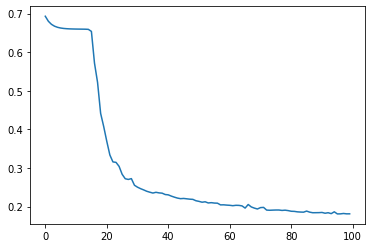

In [107]:
import matplotlib.pyplot as plt
plt.plot(costs)

In [112]:
Y_predicted,forward_cache=forward_propagation(nn_arch,X_test,parameters)

In [113]:
Y_predicted[Y_predicted>0.5]=1
Y_predicted[Y_predicted<=0.5]=0

In [117]:
np.sum(Y_predicted==Y_test)/len(Y_test)

0.956140350877193

In [119]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_predicted.reshape(-1,1),Y_test)

0.956140350877193

In [137]:
best_model = {'accuracy': -np.inf, 'cost': np.inf, 'parameters': None, 'predicted_value': None,'lr':None,'epoch':None}
epochs = [100, 1000, 10000]
lrs = [0.1, 0.01, 0.001]
for i in epochs:
    for j in lrs:
        costs, AL, parameters = training(X_train, Y_train, nn_arch, j, i)
        Y_predicted, forward_cache = forward_propagation(nn_arch, X_test, parameters)
        # thresholding
        Y_predicted[Y_predicted > 0.5] = 1
        Y_predicted[Y_predicted <= 0.5] = 0
        # Flatten arrays for sklearn accuracy
        acc = accuracy_score(Y_predicted.reshape(-1), Y_test.reshape(-1))
        if acc > best_model['accuracy'] or (acc == best_model['accuracy'] and costs[-1] < best_model['cost']):
            best_model.update({
                'accuracy': acc,
                'cost': costs[-1],
                'parameters': parameters,
                'predicted_value': Y_predicted,
                'lr':j,
                'epoch':i
            })

In [138]:
best_model

{'accuracy': 0.956140350877193,
 'cost': 0.18272770979600608,
 'parameters': {'W1': array([[ 1.78862847e-02,  4.36509851e-03,  9.64974681e-04,
          -1.86349270e-02, -2.77388203e-03, -3.54758979e-03,
          -8.27414815e-04, -6.27000677e-03, -4.38181690e-04,
          -4.77218030e-03, -1.31386475e-02,  8.84622380e-03,
           8.81318042e-03,  1.70957306e-02,  5.00336422e-04,
          -4.04677415e-03, -5.45359948e-03, -1.54647732e-02,
           9.82367434e-03, -1.10106763e-02, -1.18504653e-02,
          -2.05649899e-03,  1.48614836e-02,  2.36716267e-03,
          -1.02378514e-02, -7.12993200e-03,  6.25244966e-03,
          -1.60513363e-03, -7.68836350e-03, -2.30030722e-03],
         [-2.14311589e-01,  2.31517789e-01, -9.78539497e-01,
           1.25274479e-01, -8.00454888e-03, -1.37011033e-02,
           7.92656882e-03, -3.53903865e-03,  1.16955379e-02,
          -1.87182215e-03, -1.74767952e-02,  2.02601023e-02,
           3.89622604e-02,  4.47365327e-01, -5.78476958e-03,
  